# Домашнее задание №1
## Классификация. Логистическая регрессия, kNN и SVM.


<span style="color: red; font-size: 14pt">  Дедлайн: 24.03.2019 - 23:59 </span>  

На основе [hw1 ml at mipt](https://github.com/ml-mipt/ml-mipt/blob/master/Homeworks/HW_1_Linclass_kNN/HW1_kNN_and_Logistic_regression.ipynb)

### Часть 1. Небольшой numpy-разогрев. (5%)

In [45]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')


In [7]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(0, 100, size=(10,10))
print(A)

[[36 13 94 22 38 25 41  7 56 26]
 [65 99 85 34 48 93 77 83 81 88]
 [86 93 66 73 12 17 80 75 18 27]
 [99 14 71 40 42 67 52  3 41 45]
 [23 31  9 35 83 35 88 40 57 73]
 [26 56 35 80 72 72 15  1 57 72]
 [39 61 54  8 84 53 36 77 29 44]
 [82 34 79 80 21 45  5 11 83  3]
 [ 7 18 49 68 80 78 72 90 70 11]
 [ 2 49 34  7 22 40 53 68 35 89]]


In [9]:
# Посчитайте средние значения в матрице по столбцам
A.mean(axis=0)

array([ 46.5,  46.8,  57.6,  44.7,  50.2,  52.5,  51.9,  45.5,  52.7,  47.8])

In [11]:
# Транспонируйте матрицу A

A.T

array([[36, 65, 86, 99, 23, 26, 39, 82,  7,  2],
       [13, 99, 93, 14, 31, 56, 61, 34, 18, 49],
       [94, 85, 66, 71,  9, 35, 54, 79, 49, 34],
       [22, 34, 73, 40, 35, 80,  8, 80, 68,  7],
       [38, 48, 12, 42, 83, 72, 84, 21, 80, 22],
       [25, 93, 17, 67, 35, 72, 53, 45, 78, 40],
       [41, 77, 80, 52, 88, 15, 36,  5, 72, 53],
       [ 7, 83, 75,  3, 40,  1, 77, 11, 90, 68],
       [56, 81, 18, 41, 57, 57, 29, 83, 70, 35],
       [26, 88, 27, 45, 73, 72, 44,  3, 11, 89]])

In [15]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A * A.T

array([[1296,  845, 8084, 2178,  874,  650, 1599,  574,  392,   52],
       [ 845, 9801, 7905,  476, 1488, 5208, 4697, 2822, 1458, 4312],
       [8084, 7905, 4356, 5183,  108,  595, 4320, 5925,  882,  918],
       [2178,  476, 5183, 1600, 1470, 5360,  416,  240, 2788,  315],
       [ 874, 1488,  108, 1470, 6889, 2520, 7392,  840, 4560, 1606],
       [ 650, 5208,  595, 5360, 2520, 5184,  795,   45, 4446, 2880],
       [1599, 4697, 4320,  416, 7392,  795, 1296,  385, 2088, 2332],
       [ 574, 2822, 5925,  240,  840,   45,  385,  121, 7470,  204],
       [ 392, 1458,  882, 2788, 4560, 4446, 2088, 7470, 4900,  385],
       [  52, 4312,  918,  315, 1606, 2880, 2332,  204,  385, 7921]])

In [17]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B

B = np.dot(A, A.T)
print(B)

[[18396 27076 18511 20190 15854 16936 16749 19511 19366 12818]
 [27076 60483 41265 34997 34895 35272 37781 31609 39460 33277]
 [18511 41265 39241 25403 22638 21927 25449 25085 26827 20801]
 [20190 34997 25403 29310 20899 23251 21220 25131 23109 15582]
 [15854 34895 22638 20899 28832 23810 23494 15599 27639 21218]
 [16936 35272 21927 23251 23810 30464 22262 22986 25673 18276]
 [16749 37781 25449 21220 23494 22262 28089 17893 27451 21002]
 [19511 31609 25085 25131 15599 22986 17893 30031 22880 11523]
 [19366 39460 26827 23109 27639 25673 27451 22880 38187 21283]
 [12818 33277 20801 15582 21218 18276 21002 11523 21283 22273]]


### Часть 2. Решение задачи классификации 95%

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [58]:
all_data = pd.read_csv('../../data/forest_dataset.csv')

In [23]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [29]:
from sklearn.model_selection import train_test_split

all_data, delayed_data = train_test_split(all_data, 
                                          train_size=0.8, test_size=0.2,
                                         shuffle=True, random_state=42)

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [30]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (5%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [286]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [287]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, 
                                                                                        two_class_labels, 
                                                                                        train_size=0.8,  
                                                                                        test_size=0.2, 
                                                                                        shuffle=True, 
                                                                                        random_state=42)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [289]:
lr_clf = LogisticRegression()
lr_clf.fit(train_feature_matrix, train_labels)

acc = accuracy_score(lr_clf.predict(test_feature_matrix), test_labels)
print('accuracy = {:.3f}'.format(acc))

f1 = f1_score(lr_clf.predict(test_feature_matrix), test_labels)
print('f1 score = {:.3f}'.format(f1))

accuracy = 0.789
f1 score = 0.751


#### 2.2 Многоклассовая классификация: логистическая регрессия (30%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [290]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, 
                                                                                        labels, 
                                                                                        train_size=0.8,  
                                                                                        test_size=0.2, 
                                                                                        shuffle=True, 
                                                                                        random_state=42)

In [291]:
lr_clf = LogisticRegression(n_jobs=-1)

lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [292]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':('l1', 'l2'), 'C':np.linspace(0.01, 1, 10)}
clf = LogisticRegression(n_jobs=-1)
lr_clf = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', n_jobs=-1)
lr_clf.fit(train_feature_matrix, train_labels)

Wall time: 18.1 s


In [293]:
lr_clf.cv_results_

{'mean_fit_time': array([ 3.19685235,  0.60937314,  6.40327849,  0.88483605,  7.96809387,
         0.95963545,  8.30858216,  0.84613533,  7.29987993,  0.85371704,
         8.54993711,  0.80205455,  8.24734583,  0.83097811,  6.83771582,
         0.83357072,  7.00985508,  0.92791858,  6.56524467,  0.8668817 ]),
 'std_fit_time': array([ 0.34363495,  0.048839  ,  0.25482747,  0.04990095,  0.50698905,
         0.05331134,  1.26432919,  0.04492119,  1.21805511,  0.03889863,
         1.55900516,  0.05056927,  0.47293723,  0.03903357,  0.77535827,
         0.02407163,  0.45495771,  0.04438608,  1.07501603,  0.06562286]),
 'mean_score_time': array([ 0.00777888,  0.00338988,  0.00897565,  0.00398879,  0.01216784,
         0.00359006,  0.00379024,  0.00099769,  0.00099745,  0.00099711,
         0.00059853,  0.00099726,  0.00039907,  0.00099726,  0.00099726,
         0.00079827,  0.00079856,  0.00099759,  0.00099759,  0.00079751]),
 'std_score_time': array([  3.98993959e-04,   4.88578005e-04,   1.

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [294]:
x_l1 = list(map(lambda x: x['C'], lr_clf.cv_results_['params'][::2]))
x_l2 = list(map(lambda x: x['C'], lr_clf.cv_results_['params'][1::2]))
score_l1 = np.array(lr_clf.cv_results_['mean_train_score'][::2])
score_l2 = np.array(lr_clf.cv_results_['mean_train_score'][1::2])

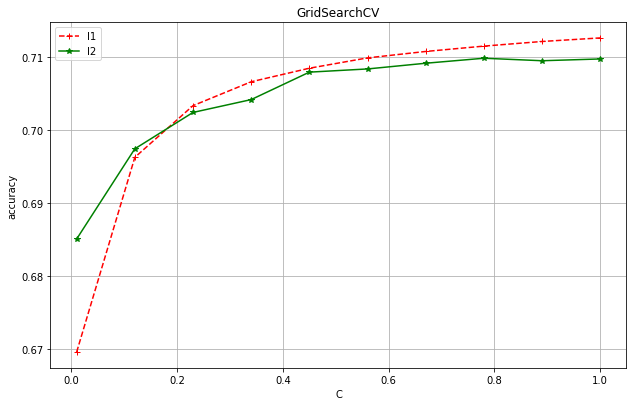

In [295]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.plot(x_l1, score_l1, 'r+--')
plt.plot(x_l2, score_l2, 'g*-')

axes.set_xlabel('C')
axes.set_ylabel('accuracy')
axes.set_title('GridSearchCV')
axes.legend([r'l1', 'l2'], loc = 0)

plt.grid()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [296]:
max_l1 = score_l1[np.argmax(score_l1)]
max_C_l1 = x_l1[np.argmax(score_l1)]

max_l2 = score_l2[np.argmax(score_l2)]
max_C_l2 = x_l2[np.argmax(score_l2)]

In [297]:
print('C_l1 = ', max_C_l1, 'score_l1 = ', max_l1)
print('C_l2 = ', max_C_l2, 'score_l2 = ', max_l2)

C_l1 =  1.0 score_l1 =  0.712647500411
C_l2 =  0.78 score_l2 =  0.70986385608


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [298]:
best_lr_clf = LogisticRegression(penalty='l1', C=1.0, n_jobs=-1)

best_lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [299]:
predict_matrix = best_lr_clf.predict_proba(test_feature_matrix)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [300]:
## усредненные по всем объектам из тестовой выборки значения вероятностей
predict_labels = {i:x for i, x in enumerate(predict_matrix.mean(axis=0))}

## частоты меток классов в обучающей выборке
unique, counts = np.unique(test_labels, return_counts=True)
true_labels = dict(zip(unique, counts/test_labels.shape[0]))

In [301]:
## соответсвие класса к разности между точной частотой меток классов к предсказнной
comparison_dict = {i+1:abs(round(x,3)) for i, x in enumerate(predict_matrix.mean(axis=0) - counts/test_labels.shape[0])}

In [302]:
comparison_dict

{1: 0.014,
 2: 0.012,
 3: 0.001,
 4: 0.001,
 5: 0.001,
 6: 0.002,
 7: 0.0030000000000000001}

In [303]:
## MSE частот
mse_acc = np.linalg.norm(predict_matrix.mean(axis=0) - counts/test_labels.shape[0])
print('MSE = {:.4f}'.format(mse_acc))

MSE = 0.0195


#### 2.3 Многоклассовая классификация: kNN (20%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

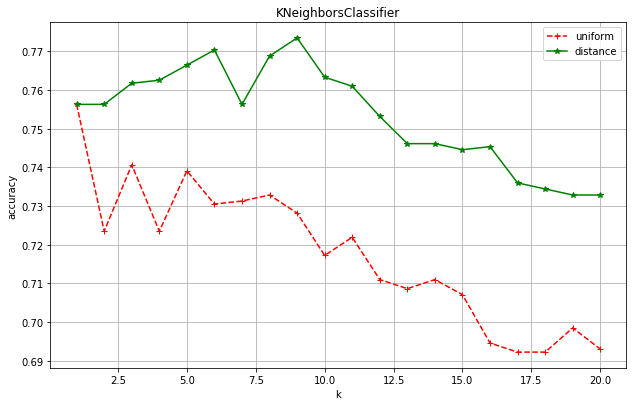

{'uniform': {'acc': 0.75624999999999998, 'k': 1}, 'distance': {'acc': 0.7734375, 'k': 9}}


In [308]:
from sklearn.neighbors import KNeighborsClassifier

fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

N = 20 ## количество перебираемых соседей
best_score = {'uniform': None, 'distance': None} ## лучший результат для каждого метода

color = {'uniform': 'r+--', 'distance': 'g*-'}
for weight in ['uniform', 'distance']:
    acc = [[]]*N
    for k in range(1, N+1):
        knn = KNeighborsClassifier(weights=weight, n_neighbors=k, n_jobs=-1)
        knn.fit(train_feature_matrix, train_labels)
        acc[k-1] = accuracy_score(knn.predict(test_feature_matrix), test_labels)
    plt.plot(np.arange(1,N+1), acc, color[weight])
    
    acc = np.array(acc)
    best_score[weight] = {'acc': np.max(acc), 'k': np.argmax(acc) + 1}

axes.set_xlabel('k')
axes.set_ylabel('accuracy')
axes.set_title('KNeighborsClassifier')
axes.legend([r'uniform', 'distance'], loc = 0)
plt.grid()
plt.show()


print(best_score)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [309]:
knn_best = KNeighborsClassifier(weights='distance', n_neighbors=9, n_jobs=-1)
knn_best.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
           weights='distance')

In [310]:
knn_predict_matrix = knn_best.predict_proba(test_feature_matrix)

#### 2.4 Метод опорных векторов (30%)

Прежде чем приступить к использованию метода опорных векторов, вспомним что для линейный моделей критично масштабировать данные, для этого воспользуемся `MinMaxScaler`. Не забывайте, что у этого класса сущестуют методы `.fit()`, `.transform()`, `.fit_transform()`. Учитывайте, что данные из отложенной выборки нам недоступны при обучении модели.

In [311]:
from sklearn.preprocessing import MinMaxScaler

In [312]:
scaler = MinMaxScaler()
train_feature_matrix_scaled = scaler.fit_transform(train_feature_matrix)
test_feature_matrix_scaled = scaler.fit_transform(test_feature_matrix)

Обучим классификатор

In [313]:
from sklearn.svm import SVC

In [314]:
%%time

parameters = {'kernel':('linear', 'rbf'), 'C':np.linspace(0.01, 1, 10)}
svc = SVC()
lr_svc = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', n_jobs=-1)
lr_svc.fit(train_feature_matrix_scaled, train_labels)

Wall time: 19.3 s


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `C` и `kernel`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `kernel` - `['linear', 'rbf']`. Критерий качества `scoring = 'accuracy'`.

Постройте графики средних значений критерия качества accuracy для типов ядер `linear` и `rbf`,  в зависимости от коэффициента `C`.

_Подсказка:_ Если метод учится слишком долго, попробуйте ограничить кол-во итераций (`max_iter`) и/или увеличить параметр останова`tol`

In [315]:
lr_svc.cv_results_

{'mean_fit_time': array([ 3.74119816,  4.68467278,  2.95410314,  4.61605711,  2.87451615,
         4.58554087,  2.90283794,  4.62543187,  2.77777267,  4.01805649,
         2.70656409,  4.14511652,  2.72690811,  3.94884205,  2.68960738,
         3.85468931,  2.63575182,  3.41446891,  2.03834853,  1.9575623 ]),
 'std_fit_time': array([ 0.12275389,  0.05951105,  0.05582605,  0.11667334,  0.05890886,
         0.19172033,  0.07330054,  0.05928377,  0.0509569 ,  0.17276868,
         0.06688914,  0.11687688,  0.14984537,  0.15275273,  0.22148411,
         0.05256552,  0.13971632,  0.21291185,  0.35881088,  0.12787282]),
 'mean_score_time': array([ 0.54893265,  0.67499571,  0.32532859,  0.70092597,  0.31455798,
         0.65824003,  0.27725816,  0.62353244,  0.25691385,  0.52998323,
         0.25092802,  0.59301476,  0.28364129,  0.57625742,  0.2595068 ,
         0.323738  ,  0.24434595,  0.31934605,  0.16755261,  0.24035802]),
 'std_score_time': array([ 0.02390761,  0.0246357 ,  0.02341881,  

In [316]:
x_linear = list(map(lambda x: x['C'], lr_svc.cv_results_['params'][::2]))
x_rbf = list(map(lambda x: x['C'], lr_svc.cv_results_['params'][1::2]))
score_linear = np.array(lr_svc.cv_results_['mean_train_score'][::2])
score_rbf = np.array(lr_svc.cv_results_['mean_train_score'][1::2])

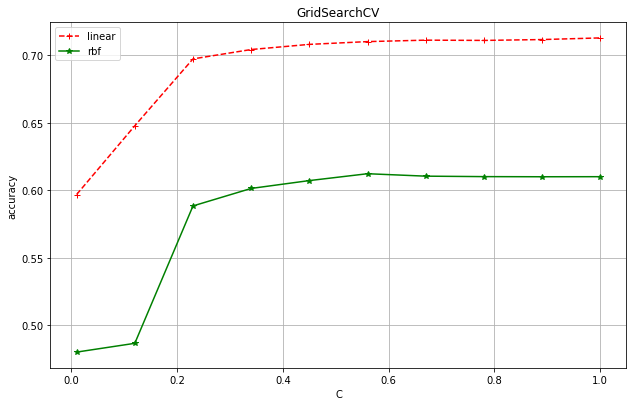

In [317]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.plot(x_linear, score_linear, 'r+--')
plt.plot(x_rbf, score_rbf, 'g*-')

axes.set_xlabel('C')
axes.set_ylabel('accuracy')
axes.set_title('GridSearchCV')
axes.legend([r'linear', 'rbf'], loc = 0)

plt.grid()
plt.show()

In [318]:
max_linear = score_linear[np.argmax(score_linear)]
max_C_linear = x_linear[np.argmax(score_linear)]

max_rbf = score_rbf[np.argmax(score_rbf)]
max_C_rbf = x_rbf[np.argmax(score_rbf)]

In [319]:
print('C_linear = ', max_C_linear, 'score_linear = ', max_linear)
print('C_rbf = ', max_C_rbf, 'score_rbf = ', max_rbf)

C_linear =  1.0 score_linear =  0.712745228314
C_rbf =  0.56 score_rbf =  0.612255731344


#### 2.5 Сравнение результатов логистической регрессии, kNN и SVC (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии, лучшего kNN и лучшей модели SVM  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [320]:
svc_best = SVC(kernel='linear', C=1.0)
svc_best.fit(train_feature_matrix_scaled, train_labels)
print('svc accuracy_score = ', accuracy_score(svc_best.predict(test_feature_matrix_scaled), test_labels))

knn_best = KNeighborsClassifier(weights='distance', n_neighbors=9, n_jobs=-1)
knn_best.fit(train_feature_matrix, train_labels)
print('knn accuracy_score = ', accuracy_score(knn_best.predict(test_feature_matrix), test_labels))

svc accuracy_score =  0.7375
knn accuracy_score =  0.7734375


In [321]:
labels_delayed = delayed_data[delayed_data.columns[-1]].values
feature_matrix_delayed = delayed_data[delayed_data.columns[:-1]].values
feature_matrix_delayed_scaled = scaler.fit_transform(feature_matrix_delayed)

In [323]:
print('Качество моделей на отложенных выборках:')

print('svc accuracy_score = ', accuracy_score(svc_best.predict(feature_matrix_delayed_scaled), labels_delayed))

print('knn accuracy_score = ', accuracy_score(knn_best.predict(feature_matrix_delayed), labels_delayed))

Качество моделей на отложенных выборках:
svc accuracy_score =  0.70875
knn accuracy_score =  0.7375
